Coby Bryant Project

Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:

import requests
import calendar
import time
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB





from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.compose import ColumnTransformer



Read in Data

In [3]:
coby = pd.read_csv('./data.csv')

Check nulls

In [5]:
coby.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [7]:
coby.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


### Start on seeing which data need to be droppped

In [9]:
coby['team_name'].value_counts()

Los Angeles Lakers    30697
Name: team_name, dtype: int64

In [10]:
coby['team_id'].value_counts()

1610612747    30697
Name: team_id, dtype: int64

In [12]:
 misses = coby['shot_made_flag'].isnull().copy()

In [13]:
misses

0         True
1        False
2        False
3        False
4        False
         ...  
30692    False
30693     True
30694    False
30695    False
30696    False
Name: shot_made_flag, Length: 30697, dtype: bool

In [16]:
miss_df= coby[misses].copy()

In [17]:
miss_df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
16,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
19,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
32,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30668,Jump Shot,Jump Shot,386,49900087,33.8223,-23,222,-118.2928,7,4,...,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-16,LAL @ IND,IND,30669
30680,Tip Shot,Tip Shot,213,49900088,34.0443,0,0,-118.2698,0,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30681
30682,Running Jump Shot,Jump Shot,226,49900088,33.9963,-68,48,-118.3378,11,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30683
30686,Running Jump Shot,Jump Shot,268,49900088,33.9513,16,93,-118.2538,5,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30687


In [18]:
# drop team_name, team_id, game_id, matchup, shot_id
coby.drop(columns = ['team_name', 'team_id', 'game_id', 'matchup', 'shot_id'], inplace = True)

In [ ]:
miss_df.drop

In [19]:
coby

,action_type,combined_shot_type,game_event_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent
0,Jump Shot,Jump Shot,10,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR
1,Jump Shot,Jump Shot,12,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR
2,Jump Shot,Jump Shot,35,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR
3,Jump Shot,Jump Shot,43,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR
4,Driving Dunk Shot,Dunk,155,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,IND
30693,Tip Shot,Tip Shot,398,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-06-19,IND
30694,Running Jump Shot,Jump Shot,426,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,IND
30695,Jump Shot,Jump Shot,448,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,IND


In [20]:
kobe_scored =  coby[pd.notnull(coby['shot_made_flag'])]

In [ ]:
kobe_scored =  coby[pd.notnull(coby['shot_made_flag'])]

In [23]:
kobe_scored['shot_made_flag'].unique()

array([0., 1.])

## Distance seems to be the most important  

Text(0.5, 1.0, 'shots')

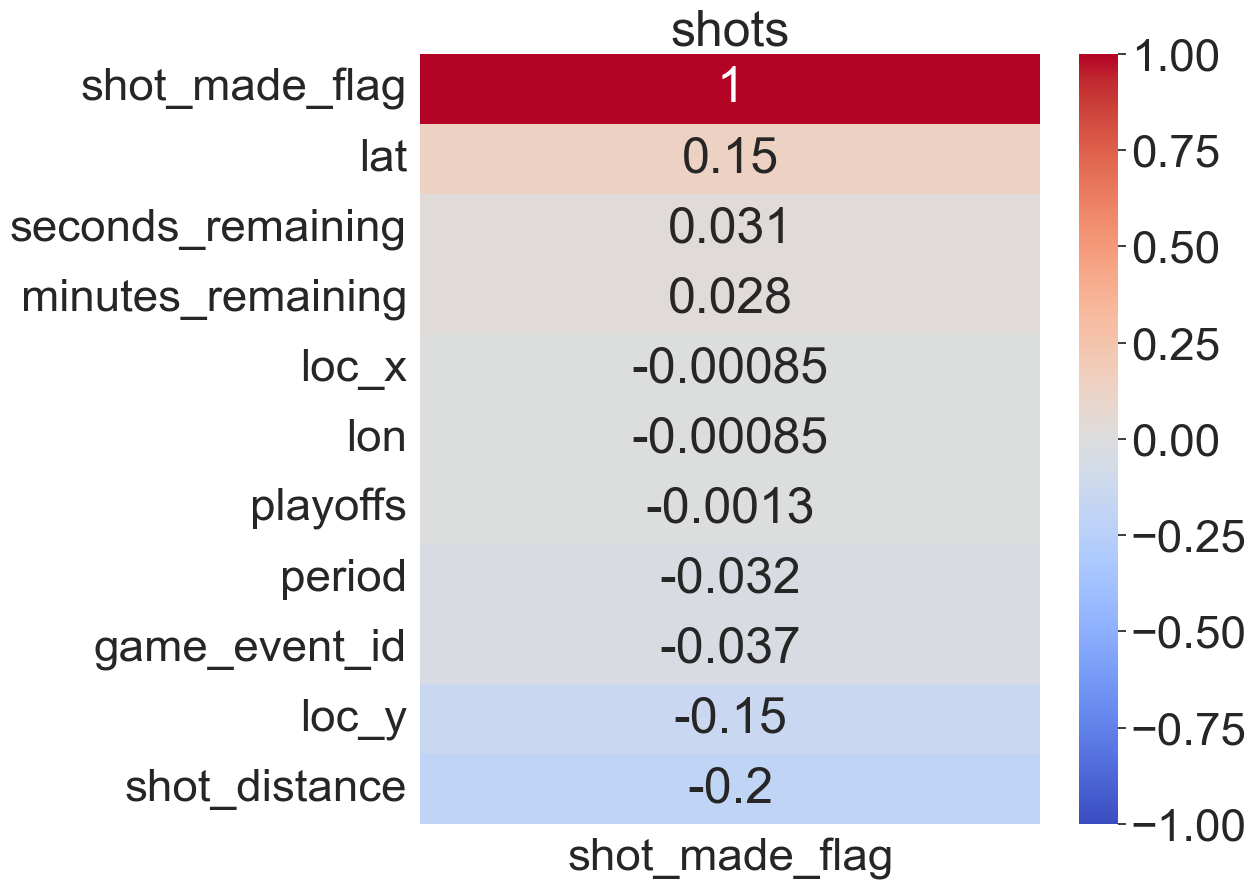

In [26]:
# select only the sales column
plt.figure(figsize=(10, 10))
sns.heatmap(kobe_scored.corr()[['shot_made_flag']].sort_values(by = 'shot_made_flag', ascending = False),
           cmap = 'coolwarm',
           vmax = 1,
           vmin = -1,
           annot = True);
sns.set(font_scale=3)
plt.title('shots')

## Make dumies for categoricals

In [27]:
kobe_scored

,action_type,combined_shot_type,game_event_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent
1,Jump Shot,Jump Shot,12,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR
2,Jump Shot,Jump Shot,35,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR
3,Jump Shot,Jump Shot,43,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR
4,Driving Dunk Shot,Dunk,155,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR
5,Jump Shot,Jump Shot,244,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Driving Layup Shot,Layup,382,34.0443,0,0,-118.2698,7,4,1,1999-00,4,0,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-06-19,IND
30692,Jump Shot,Jump Shot,397,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,IND
30694,Running Jump Shot,Jump Shot,426,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,IND
30695,Jump Shot,Jump Shot,448,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,IND


In [29]:
kobed = pd.get_dummies(data = kobe_scored, columns = ['combined_shot_type', 'season','shot_type', 'shot_zone_area','shot_zone_basic','shot_zone_range', 'opponent'], drop_first = True)
kobed

,action_type,game_event_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
1,Jump Shot,12,34.0443,-157,0,-118.4268,10,1,0,22,...,0,0,1,0,0,0,0,0,0,0
2,Jump Shot,35,33.9093,-101,135,-118.3708,7,1,0,45,...,0,0,1,0,0,0,0,0,0,0
3,Jump Shot,43,33.8693,138,175,-118.1318,6,1,0,52,...,0,0,1,0,0,0,0,0,0,0
4,Driving Dunk Shot,155,34.0443,0,0,-118.2698,6,2,0,19,...,0,0,1,0,0,0,0,0,0,0
5,Jump Shot,244,34.0553,-145,-11,-118.4148,9,3,0,32,...,0,0,1,0,0,0,0,0,0,0


In [30]:
kobed

,action_type,game_event_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
1,Jump Shot,12,34.0443,-157,0,-118.4268,10,1,0,22,...,0,0,1,0,0,0,0,0,0,0
2,Jump Shot,35,33.9093,-101,135,-118.3708,7,1,0,45,...,0,0,1,0,0,0,0,0,0,0
3,Jump Shot,43,33.8693,138,175,-118.1318,6,1,0,52,...,0,0,1,0,0,0,0,0,0,0
4,Driving Dunk Shot,155,34.0443,0,0,-118.2698,6,2,0,19,...,0,0,1,0,0,0,0,0,0,0
5,Jump Shot,244,34.0553,-145,-11,-118.4148,9,3,0,32,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Driving Layup Shot,382,34.0443,0,0,-118.2698,7,4,1,4,...,0,0,0,0,0,0,0,0,0,0
30692,Jump Shot,397,33.9963,1,48,-118.2688,6,4,1,5,...,0,0,0,0,0,0,0,0,0,0
30694,Running Jump Shot,426,33.8783,-134,166,-118.4038,3,4,1,28,...,0,0,0,0,0,0,0,0,0,0
30695,Jump Shot,448,33.7773,31,267,-118.2388,2,4,1,10,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop team_name, team_id, game_id, matchup, shot_id
kobed.drop(columns = ['team_name', 'team_id', 'game_id', 'matchup', 'shot_id','game_event_id','loc_x',''], inplace = True)


In [33]:
kobed.columns

Index(['action_type', 'game_event_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'game_date',
       'combined_shot_type_Dunk', 'combined_shot_type_Hook Shot',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Layup',
       'combined_shot_type_Tip Shot', 'season_1997-98', 'season_1998-99',
       'season_1999-00', 'season_2000-01', 'season_2001-02', 'season_2002-03',
       'season_2003-04', 'season_2004-05', 'season_2005-06', 'season_2006-07',
       'season_2007-08', 'season_2008-09', 'season_2009-10', 'season_2010-11',
       'season_2011-12', 'season_2012-13', 'season_2013-14', 'season_2014-15',
       'season_2015-16', 'shot_type_3PT Field Goal',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_basic_Backcourt',
       

Text(0.5, 1.0, 'shots')

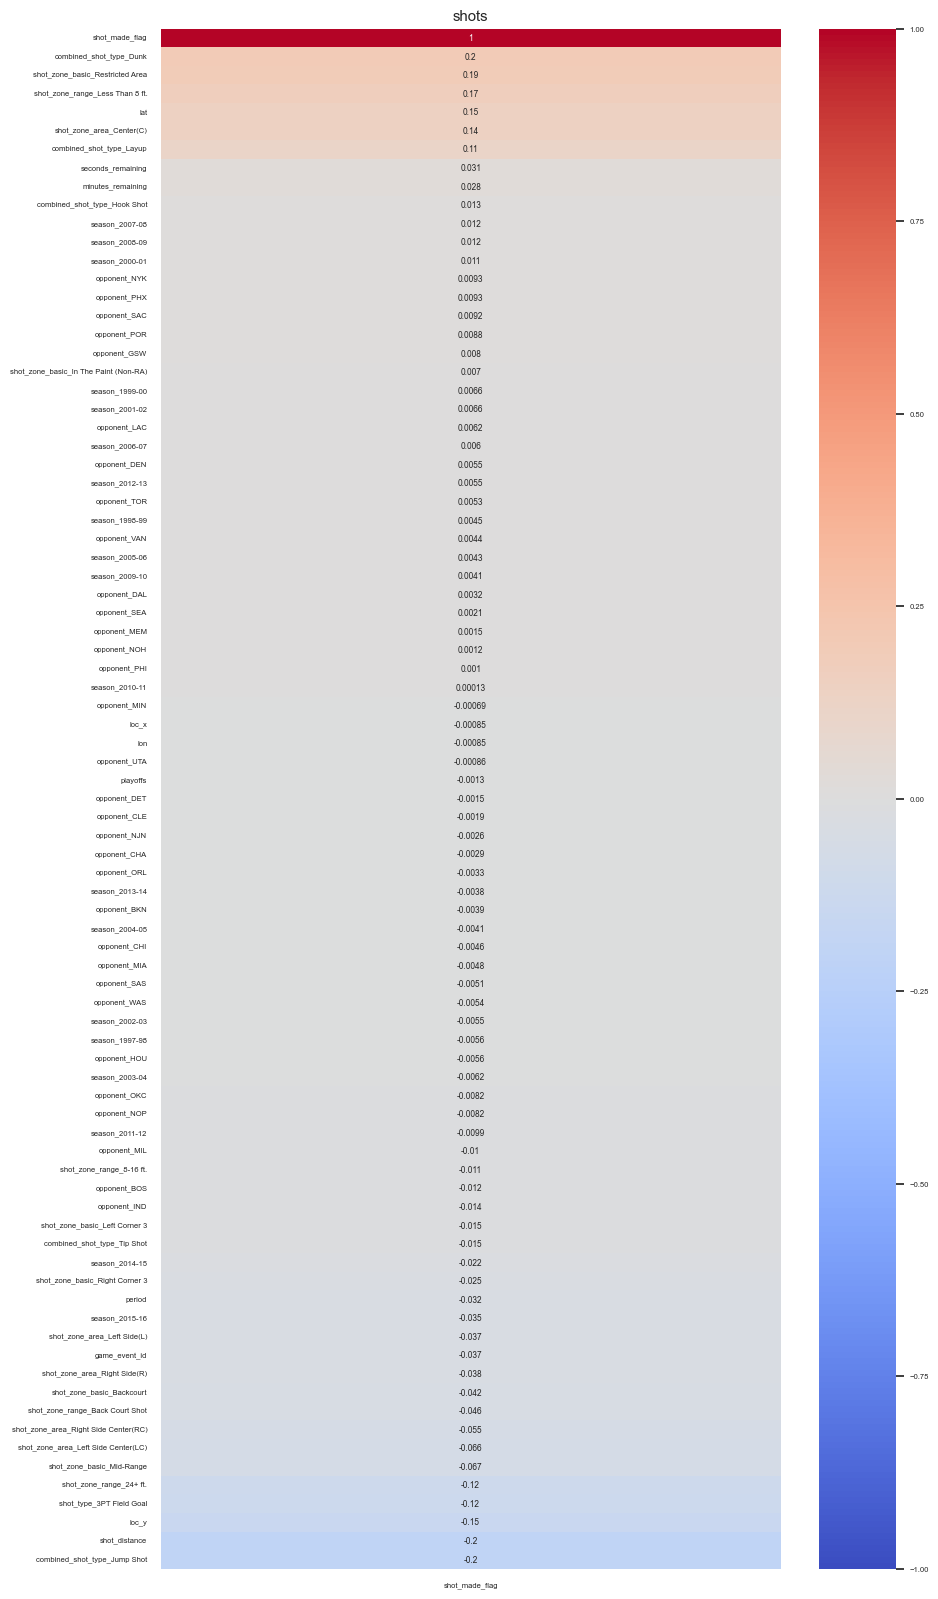

In [43]:
# select only the sales column
plt.figure(figsize=(10, 20))
sns.heatmap(kobed.corr()[['shot_made_flag']].sort_values(by = 'shot_made_flag', ascending = False),
           cmap = 'coolwarm',
           vmax = 1,
           vmin = -1,
           annot = True);
sns.set(font_scale=.9)
plt.title('shots')

#### Positionality will be important in determining if kobe made a shot

Text(0.5, 1.0, 'lat and lon')

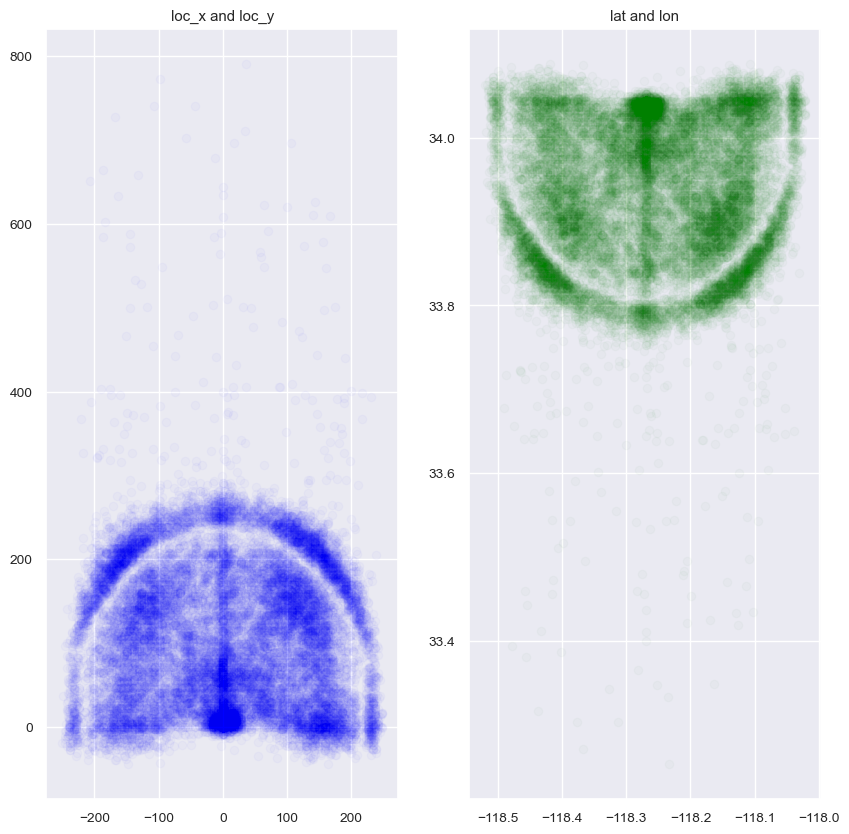

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].scatter(kobe_scored.loc_x, kobe_scored.loc_y, color='blue', alpha=alpha)
ax[0].set_title('loc_x and loc_y')
ax[1].scatter(kobe_scored.lon, kobe_scored.lat, color='green', alpha=alpha)
ax[1].set_title('lat and lon')
#https://www.kaggle.com/code/canwoongdoit/data-analysis-for-beginners-jwu

## Random Forest

In [ ]:
kobed.info()

In [52]:
kobed.drop('action_type', axis = 1, inplace = True)

In [60]:
kobed.drop('game_date', axis = 1, inplace = True)

In [61]:
X = kobed.drop(columns=['shot_made_flag'])
y = kobed['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [62]:
rf_pipe = Pipeline([
    ('ss', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

In [63]:
rf_pipe_params = {
    'rf__n_estimators':[50,100,150],
    'rf__max_depth':[None,5],
    'rf__min_samples_split':[2,5,10],
    'rf__ccp_alpha':[0,.01,.1],
    
}

In [64]:
rf_gs = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [65]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__ccp_alpha': [0, 0.01, 0.1],
                         'rf__max_depth': [None, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [72]:
rf_gs.score(X_test, y_test)

0.6094941634241245

In [81]:
rf_gs.best_params_

{'rf__ccp_alpha': 0,
 'rf__max_depth': 5,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 100}

## Slightly better than baseline 


In [73]:
y_train.value_counts(normalize=True)

0.0    0.553861
1.0    0.446139
Name: shot_made_flag, dtype: float64

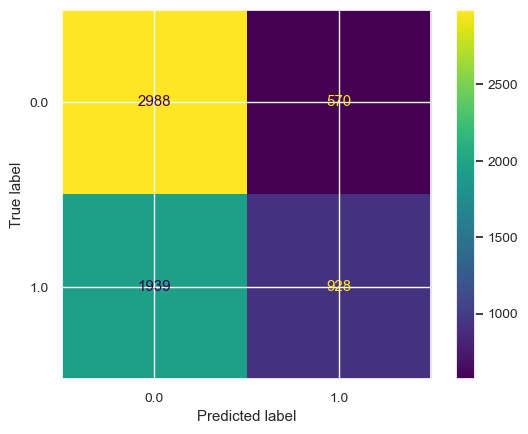

In [74]:
ConfusionMatrixDisplay.from_estimator(rf_gs, X_test, y_test);

### Check Feature Importances

In [75]:
f_ss=StandardScaler(with_mean=False) 

In [78]:
f_ss.fit(X_train)
f_ss.fit(X_test)

StandardScaler(with_mean=False)

In [79]:
X_train= f_ss.transform(X_train)
X_test = f_ss.transform(X_test)

In [ ]:
### match params

In [83]:
rf = RandomForestClassifier(ccp_alpha=0, min_samples_split=10, n_estimators=  100, max_depth = 5)

In [84]:
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0, max_depth=5, min_samples_split=10)

### score matches with previous model

In [87]:
rf.score(X_test, y_test)

0.6074708171206226

In [91]:
importances = rf.feature_importances_

In [94]:
feature_names = X.columns

In [95]:
indices = np.argsort(importances)[::-1]

In [96]:
N = 50
top_N_indices = indices[:N]
top_N_features = [feature_names[i] for i in top_N_indices]

In [97]:
top_N_features 

['combined_shot_type_Dunk',
 'combined_shot_type_Jump Shot',
 'shot_zone_basic_Restricted Area',
 'shot_distance',
 'loc_y',
 'lat',
 'combined_shot_type_Layup',
 'shot_zone_range_Less Than 8 ft.',
 'shot_type_3PT Field Goal',
 'shot_zone_area_Center(C)',
 'lon',
 'loc_x',
 'shot_zone_range_24+ ft.',
 'game_event_id',
 'shot_zone_basic_Mid-Range',
 'seconds_remaining',
 'minutes_remaining',
 'shot_zone_basic_In The Paint (Non-RA)',
 'shot_zone_range_8-16 ft.',
 'period',
 'combined_shot_type_Tip Shot',
 'shot_zone_area_Right Side(R)',
 'shot_zone_area_Left Side Center(LC)',
 'shot_zone_basic_Backcourt',
 'shot_zone_range_Back Court Shot',
 'shot_zone_area_Left Side(L)',
 'season_2003-04',
 'season_2002-03',
 'season_2010-11',
 'season_2015-16',
 'season_2000-01',
 'opponent_CHA',
 'season_2008-09',
 'season_2005-06',
 'playoffs',
 'season_2011-12',
 'season_2004-05',
 'opponent_GSW',
 'season_1997-98',
 'opponent_MIA',
 'opponent_IND',
 'opponent_MIL',
 'opponent_NYK',
 'opponent_UTA',

In [107]:
N = 35
top_N_indices = indices[:N]
top_N_features = [feature_names[i] for i in top_N_indices]

Text(0.5, 1.0, 'Feature Importance (Random Forest)')

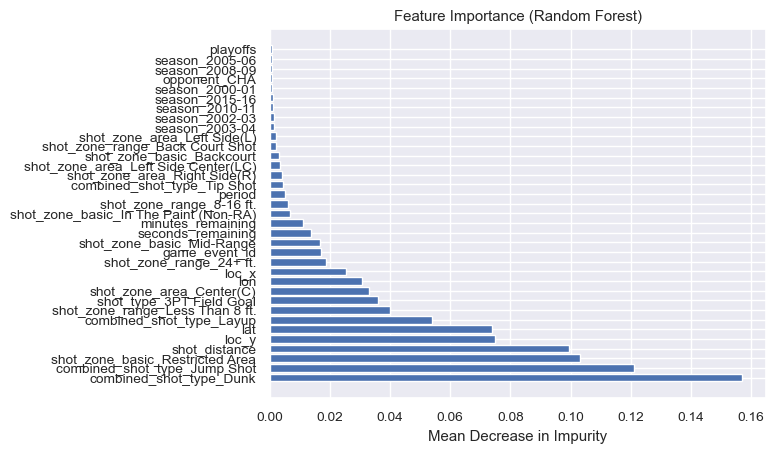

In [108]:
plt.barh(range(N), importances[top_N_indices], align='center')
plt.yticks(range(N), [feature_names[i] for i in top_N_indices])
plt.xlabel('Mean Decrease in Impurity')
plt.title('Feature Importance (Random Forest)')

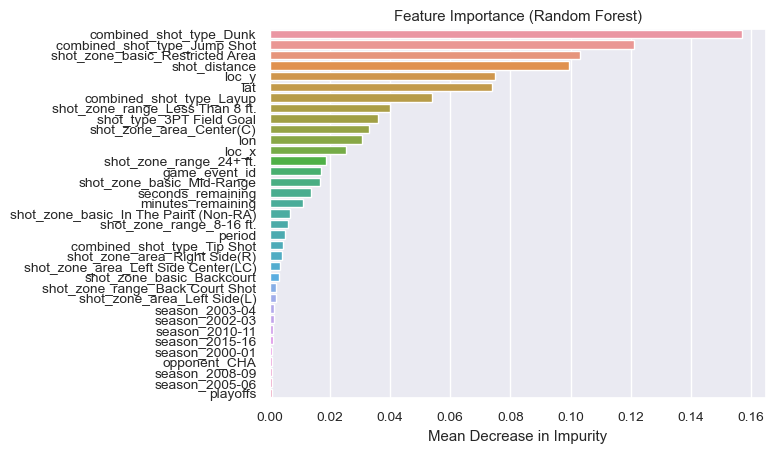

In [109]:
import seaborn as sns

# Create bar chart
sns.barplot(x=importances[top_N_indices], y=[feature_names[i] for i in top_N_indices],orient='h')
plt.xlabel('Mean Decrease in Impurity')
plt.title('Feature Importance (Random Forest)')

# Show chart
plt.show()

### make new feature list based on heatmap and importances

In [241]:
features = ['lat','lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance',
       'combined_shot_type_Dunk', 'combined_shot_type_Hook Shot',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Layup',
       'combined_shot_type_Tip Shot','shot_type_3PT Field Goal',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_basic_Backcourt',
       'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3',
       'shot_zone_range_24+ ft.', 'shot_zone_range_8-16 ft.',
       'shot_zone_range_Back Court Shot', 'shot_zone_range_Less Than 8 ft.'
       ]

X = kobed[features]
y = kobed['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [242]:
rf_pipe2 = Pipeline([
    ('ss', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

In [243]:
rf_pipe_params2 = {
    'rf__n_estimators':[50,100,150],
    'rf__max_depth':[None,5],
    'rf__min_samples_split':[2,5,10],
    'rf__ccp_alpha':[0,.01,.1],
    
}

In [244]:
rf_gs2 = GridSearchCV(rf_pipe2, param_grid = rf_pipe_params2, n_jobs=-1)

In [245]:
rf_gs2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__ccp_alpha': [0, 0.01, 0.1],
                         'rf__max_depth': [None, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [246]:
rf_gs2.score(X_test, y_test)

0.6115175097276264

In [118]:
rf_gs.best_params_

{'rf__ccp_alpha': 0,
 'rf__max_depth': 5,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 100}

### Numerical only

In [256]:
features = ['lat','lon'
       
       ]

X = kobed[features]
y = kobed['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [257]:
rf_pipe3 = Pipeline([
    ('ss', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

In [258]:
rf_pipe_params3 = {
    'rf__n_estimators':[50,100,150],
    'rf__max_depth':[None,5],
    'rf__min_samples_split':[2,5,10],
    'rf__ccp_alpha':[0,.01,.1],
    
}

In [259]:
rf_gs3 = GridSearchCV(rf_pipe3, param_grid = rf_pipe_params3, n_jobs=-1)

In [260]:
rf_gs3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__ccp_alpha': [0, 0.01, 0.1],
                         'rf__max_depth': [None, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [261]:
rf_gs3.score(X_test, y_test)

0.6074708171206226

## Without mean = false

In [262]:
features = ['lat','lon',
       
       ]

X = kobed[features]
y = kobed['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [263]:
rf_pipe4 = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [264]:
rf_pipe_params4 = {
    'rf__n_estimators':[50,100,150],
    'rf__max_depth':[None,5],
    'rf__min_samples_split':[2,5,10],
    'rf__ccp_alpha':[0,.01,.1],
    
}

In [265]:
rf_gs4 = GridSearchCV(rf_pipe4, param_grid = rf_pipe_params4, n_jobs=-1)

In [266]:
rf_gs4.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__ccp_alpha': [0, 0.01, 0.1],
                         'rf__max_depth': [None, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [267]:
rf_gs4.score(X_test, y_test)

0.6077821011673151

In [146]:
rf_gs4.score(X_test, y_test)

0.6065369649805448

# Trying PCA for some reason 

In [150]:
from scipy.stats import zscore

In [191]:
features = ['lat','lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance',
       'combined_shot_type_Dunk', 'combined_shot_type_Hook Shot',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Layup',
       'combined_shot_type_Tip Shot','shot_type_3PT Field Goal',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_basic_Backcourt',
       'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3',
       'shot_zone_range_24+ ft.', 'shot_zone_range_8-16 ft.',
       'shot_zone_range_Back Court Shot', 'shot_zone_range_Less Than 8 ft.','shot_made_flag'
       ]


In [188]:
koby_pca =  kobed[features].apply(zscore)



In [190]:
koby_pca['shot_made_flag']= kobed['shot_made_flag']

In [155]:
from sklearn.decomposition import PCA

In [156]:
pca = PCA(n_components=5)
pca.fit(koby_pca)

PCA(n_components=5)

In [157]:
explained_variance_ratios = pca.explained_variance_ratio_
print(explained_variance_ratios)

[0.22565478 0.11676853 0.07906792 0.07110305 0.05943017]


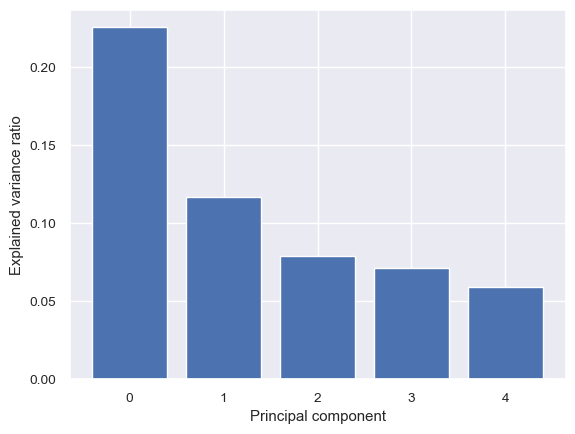

In [158]:
plt.bar(range(len(explained_variance_ratios)), explained_variance_ratios)
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()

In [175]:
koby_pca

,lat,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,...,shot_zone_basic_In The Paint (Non-RA),shot_zone_basic_Left Corner 3,shot_zone_basic_Mid-Range,shot_zone_basic_Restricted Area,shot_zone_basic_Right Corner 3,shot_zone_range_24+ ft.,shot_zone_range_8-16 ft.,shot_zone_range_Back Court Shot,shot_zone_range_Less Than 8 ft.,shot_made_flag
1,1.035246,-1.491296,1.481054,-1.320593,-0.413876,-0.360186,0.164339,-0.207015,-0.070475,0.551139,...,-0.421714,-0.097096,1.199957,-0.547838,-0.114581,-0.508596,1.898736,-0.053007,-0.663638,-0.897541
2,-0.496228,-0.982533,0.612096,-1.320593,-0.413876,0.952371,0.270852,-0.207015,-0.070475,0.551139,...,-0.421714,-0.097096,1.199957,-0.547838,-0.114581,-0.508596,-0.526666,-0.053007,-0.663638,1.114156
3,-0.949998,1.188792,0.322443,-1.320593,-0.413876,1.351845,0.909929,-0.207015,-0.070475,0.551139,...,-0.421714,-0.097096,1.199957,-0.547838,-0.114581,-0.508596,-0.526666,-0.053007,-0.663638,-0.897541
4,1.035246,-0.064944,0.322443,-0.452239,-0.413876,-0.531389,-1.433353,4.830557,-0.070475,-1.814424,...,-0.421714,-0.097096,-0.833363,1.825357,-0.114581,-0.508596,-0.526666,-0.053007,1.506847,1.114156
5,1.160033,-1.382275,1.191401,0.416115,-0.413876,0.210491,0.057826,-0.207015,-0.070475,0.551139,...,-0.421714,-0.097096,1.199957,-0.547838,-0.114581,-0.508596,1.898736,-0.053007,-0.663638,-0.897541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,1.035246,-0.064944,0.612096,1.284470,2.416184,-1.387404,-1.433353,-0.207015,-0.070475,-1.814424,...,-0.421714,-0.097096,-0.833363,1.825357,-0.114581,-0.508596,-0.526666,-0.053007,1.506847,-0.897541
30692,0.490722,-0.055859,0.322443,1.284470,2.416184,-1.330336,-1.007302,-0.207015,-0.070475,0.551139,...,2.371274,-0.097096,-0.833363,-0.547838,-0.114581,-0.508596,-0.526666,-0.053007,1.506847,-0.897541
30694,-0.847899,-1.282340,-0.546516,1.284470,2.416184,-0.017780,0.803416,-0.207015,-0.070475,0.551139,...,-0.421714,-0.097096,1.199957,-0.547838,-0.114581,-0.508596,-0.526666,-0.053007,-0.663638,1.114156
30695,-1.993668,0.216693,-0.836169,1.284470,2.416184,-1.044998,1.335980,-0.207015,-0.070475,0.551139,...,-0.421714,-0.097096,-0.833363,-0.547838,-0.114581,1.966198,-0.526666,-0.053007,-0.663638,-0.897541


In [198]:
features = ['lat','lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance',
       'combined_shot_type_Dunk', 'combined_shot_type_Hook Shot',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Layup',
       'combined_shot_type_Tip Shot','shot_type_3PT Field Goal',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_basic_Backcourt',
       'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3',
       'shot_zone_range_24+ ft.', 'shot_zone_range_8-16 ft.',
       'shot_zone_range_Back Court Shot', 'shot_zone_range_Less Than 8 ft.'
       ]


In [ ]:
pca = PCA(n_components=3)

In [207]:
X = koby_pca[features]
y = koby_pca['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [208]:
rf_pipe5 = Pipeline([
('pca', PCA()),
('rf', RandomForestClassifier())
])

In [209]:
rf_pipe_params5 = {
'rf__n_estimators':[50,100,150],
'rf__max_depth':[5],
'rf__min_samples_split':[2,5,10],
'rf__ccp_alpha':[0,.01,.1],
'pca__n_components':[0.95,0.90,0.85,3,5],
'pca__whiten':[True,False]
}



In [210]:
rf_gs5 = GridSearchCV(rf_pipe5, param_grid = rf_pipe_params5, n_jobs=-1)

In [211]:
rf_gs5.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.95, 0.9, 0.85, 3, 5],
                         'pca__whiten': [True, False],
                         'rf__ccp_alpha': [0, 0.01, 0.1], 'rf__max_depth': [5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [212]:
rf_gs5.score(X_train, y_train)

0.6189809049398091

In [213]:
rf_gs5.score(X_test, y_test)

0.6099610894941634

In [214]:
rf_gs5.best_params_

{'pca__n_components': 0.95,
 'pca__whiten': False,
 'rf__ccp_alpha': 0,
 'rf__max_depth': 5,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 50}

In [218]:
features = [
       'lon',
       'combined_shot_type_Dunk', 'combined_shot_type_Hook Shot',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Layup',
       'combined_shot_type_Tip Shot','shot_type_3PT Field Goal',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_basic_Backcourt',
       'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3',
       'shot_zone_range_24+ ft.', 'shot_zone_range_8-16 ft.',
       'shot_zone_range_Back Court Shot', 'shot_zone_range_Less Than 8 ft.'
       ]


In [224]:
X = koby_pca[features]
y = koby_pca['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [225]:
rf_pipe6 = Pipeline([
('pca', PCA()),
('rf', RandomForestClassifier())
])

In [226]:
rf_pipe_params6 = {
'rf__n_estimators':[50],
'rf__max_depth':[5],
'rf__min_samples_split':[5],
'rf__ccp_alpha':[0,.01,.1],
'pca__n_components':[0.95],
'pca__whiten':[True,False]
}


In [227]:
rf_gs6 = GridSearchCV(rf_pipe6, param_grid = rf_pipe_params6, n_jobs=-1)

In [228]:
rf_gs6.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.95],
                         'pca__whiten': [True, False],
                         'rf__ccp_alpha': [0, 0.01, 0.1], 'rf__max_depth': [5],
                         'rf__min_samples_split': [5],
                         'rf__n_estimators': [50]})

In [229]:
rf_gs6.score(X_test, y_test)

0.6098054474708171

### Poly Features attempt

In [230]:
features = ['lat','lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance',
       'combined_shot_type_Dunk', 'combined_shot_type_Hook Shot',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Layup',
       'combined_shot_type_Tip Shot','shot_type_3PT Field Goal',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_basic_Backcourt',
       'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3',
       'shot_zone_range_24+ ft.', 'shot_zone_range_8-16 ft.',
       'shot_zone_range_Back Court Shot', 'shot_zone_range_Less Than 8 ft.'
       ]


In [233]:
from sklearn.preprocessing import PolynomialFeatures

In [234]:
X = koby_pca[features]
y = koby_pca['shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [236]:
rf_pipe7 = Pipeline([
('pca', PCA()),
('pf', PolynomialFeatures(degree=2,interaction_only=False, include_bias=True, order='C')),
('rf', RandomForestClassifier())
])

In [237]:
rf_pipe_params7 = {
'rf__n_estimators':[50],
'rf__max_depth':[5],
'rf__min_samples_split':[5],
'rf__ccp_alpha':[0,.01,.1],
'pca__n_components':[0.95],
'pca__whiten':[True,False]
}

In [238]:
rf_gs7 = GridSearchCV(rf_pipe7, param_grid = rf_pipe_params7, n_jobs=-1)

In [239]:
rf_gs7.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('pf', PolynomialFeatures()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.95],
                         'pca__whiten': [True, False],
                         'rf__ccp_alpha': [0, 0.01, 0.1], 'rf__max_depth': [5],
                         'rf__min_samples_split': [5],
                         'rf__n_estimators': [50]})

In [240]:
rf_gs7.score(X_test, y_test)

0.6094941634241245